### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score

In [5]:
from sklearn import preprocessing

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.constraints import maxnorm

### Loading Dataset

In [8]:
# Loading Dataset
Dataset = pd.read_csv("propulsion.csv")

In [9]:
# Dropping number column
Dataset = Dataset.drop(['Unnamed: 0'], axis=1)

In [10]:
Dataset.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [11]:
# Column names of the Data
Dataset.columns

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor inlet air temperature (T1) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor inlet air pressure (P1) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

### Dropping rows with no entries

In [12]:
# Dataset shape before dropping rows
Dataset.shape

(10000, 18)

In [13]:
Dataset = Dataset.dropna()

In [14]:
# Dataset shape after dropping rows
Dataset.shape

(10000, 18)

In [15]:
Dataset.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


### Dropping columns with all same entry

In [16]:
Dataset['GT Compressor inlet air pressure (P1) [bar]'].unique()

array([0.998])

In [17]:
Dataset['GT Compressor inlet air temperature (T1) [C]'].unique()

array([288.])

In [18]:
Dataset = Dataset.drop(['GT Compressor inlet air pressure (P1) [bar]', 'GT Compressor inlet air temperature (T1) [C]'], axis=1)

In [19]:
Dataset.shape

(10000, 16)

### Statistics of the Dataset

In [20]:
Dataset.describe()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.150075,14.951400,27100.647713,2131.151788,8194.182366,225.957785,225.957785,734.476177,645.748980,2.345732,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,72.483036,1.081038,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,540.999000,1.093000,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,577.980750,1.389000,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,636.800000,2.082000,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,693.656750,2.981000,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,789.094000,4.560000,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


In [21]:
Dataset.dtypes

Lever position (lp) [ ]                          float64
Ship speed (v) [knots]                           float64
Gas Turbine shaft torque (GTT) [kN m]            float64
Gas Turbine rate of revolutions (GTn) [rpm]      float64
Gas Generator rate of revolutions (GGn) [rpm]    float64
Starboard Propeller Torque (Ts) [kN]             float64
Port Propeller Torque (Tp) [kN]                  float64
HP Turbine exit temperature (T48) [C]            float64
GT Compressor outlet air temperature (T2) [C]    float64
HP Turbine exit pressure (P48) [bar]             float64
GT Compressor outlet air pressure (P2) [bar]     float64
Gas Turbine exhaust gas pressure (Pexh) [bar]    float64
Turbine Injecton Control (TIC) [%]               float64
Fuel flow (mf) [kg/s]                            float64
GT Compressor decay state coefficient.           float64
GT Turbine decay state coefficient.              float64
dtype: object

### Feature Selection (Recursive Feature Elimination)

In [22]:
Data = Dataset.values

X   = Data[:,:14]        # Features
Y_1 = Data[:,14]         # GT Compressor decay state coefficient
Y_2 = Data[:,15]         # GT Turbine decay state coefficient

In [23]:
columns_name = Dataset.columns

In [24]:
columns_name

Index(['Lever position (lp) [ ]', 'Ship speed (v) [knots]',
       'Gas Turbine shaft torque (GTT) [kN m]',
       'Gas Turbine rate of revolutions (GTn) [rpm]',
       'Gas Generator rate of revolutions (GGn) [rpm]',
       'Starboard Propeller Torque (Ts) [kN]',
       'Port Propeller Torque (Tp) [kN]',
       'HP Turbine exit temperature (T48) [C]',
       'GT Compressor outlet air temperature (T2) [C]',
       'HP Turbine exit pressure (P48) [bar]',
       'GT Compressor outlet air pressure (P2) [bar]',
       'Gas Turbine exhaust gas pressure (Pexh) [bar]',
       'Turbine Injecton Control (TIC) [%]', 'Fuel flow (mf) [kg/s]',
       'GT Compressor decay state coefficient.',
       'GT Turbine decay state coefficient.'],
      dtype='object')

#### For :- GT Compressor decay state coefficient

In [25]:
model = ExtraTreesRegressor()                        # Making the model
rfe = RFE(model, n_features_to_select=3)             # Number of features to be selected
fit = rfe.fit(X, Y_1)                                # Training the data

print("Number of Features: ", fit.n_features_)       # Numbers of features
print("Selected Features: ", fit.support_)           # Selected Features
print("Feature Ranking: ", fit.ranking_)             # Features ranks

Number of Features:  3
Selected Features:  [False False False False  True False False False  True False False  True
 False False]
Feature Ranking:  [12 11  2  5  1  7  6  4  1  3  9  1  8 10]


In [26]:
# Selected Features :-
Selected_features_GTC = []
for i in range(len(fit.ranking_)):
    if fit.ranking_[i] == 1:
        Selected_features_GTC.append(columns_name[i])
Selected_features_GTC

['Gas Generator rate of revolutions (GGn) [rpm]',
 'GT Compressor outlet air temperature (T2) [C]',
 'Gas Turbine exhaust gas pressure (Pexh) [bar]']

#### GT Turbine decay state coefficient

In [27]:
model = ExtraTreesRegressor()                        # Making the model
rfe = RFE(model, n_features_to_select=3)             # Number of features to be selected
fit = rfe.fit(X, Y_2)                                # Training the data

print("Number of Features: ", fit.n_features_)       # Numbers of features
print("Selected Features: ", fit.support_)           # Selected Features
print("Feature Ranking: ", fit.ranking_)             # Features ranks

Number of Features:  3
Selected Features:  [False False False False  True False False False False False  True False
 False  True]
Feature Ranking:  [11 12  3  4  1  9 10  5  8  6  1  7  2  1]


In [28]:
# Selected Features :-
Selected_features_GTT = []
for i in range(len(fit.ranking_)):
    if fit.ranking_[i] == 1:
        Selected_features_GTT.append(columns_name[i])
Selected_features_GTT

['Gas Generator rate of revolutions (GGn) [rpm]',
 'GT Compressor outlet air pressure (P2) [bar]',
 'Fuel flow (mf) [kg/s]']

### Splitting Data in Train/Test     [70:30]

In [29]:
X_1 = Dataset[['Gas Generator rate of revolutions (GGn) [rpm]', 'GT Compressor outlet air temperature (T2) [C]', 'Gas Turbine exhaust gas pressure (Pexh) [bar]']]
X_2 = Dataset[['Gas Generator rate of revolutions (GGn) [rpm]', 'GT Compressor outlet air pressure (P2) [bar]', 'Fuel flow (mf) [kg/s]']]
Y_1 = Dataset['GT Compressor decay state coefficient.']
Y_2 = Dataset['GT Turbine decay state coefficient.']

In [30]:
X_1_Train, X_1_Test, Y_1_Train, Y_1_Test = train_test_split(X_1, Y_1, test_size=0.3)      # For Case-I
X_2_Train, X_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_2, Y_2, test_size=0.3)      # For Case-II

### Building Model

#### GT Compressor decay state coefficient 

In [31]:
models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

#### For GT Turbine decay state coefficient

In [32]:
Model = Sequential()
Model.add(Dense(6, input_dim=3, activation='relu'))
Model.add(Dropout(0.2))
Model.add(Dense(4, activation='relu', kernel_constraint=maxnorm(3)))
Model.add(Dropout(0.2))
Model.add(Dense(2, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))

Model.compile(loss='mean_absolute_error', optimizer='adam')

### Training+Evaluating Model

#### For GT Compressor decay state coefficient

In [33]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X_1_Train, Y_1_Train)
    
    predictions = model.predict(X_1_Test)
    
    # Evaluate the model
    score = explained_variance_score(Y_1_Test, predictions)
    mae = mean_absolute_error(predictions, Y_1_Test)
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.399705 (0.009197)
Ridge: 0.023563 (0.012718)
Bag_Re: 0.940857 (0.001274)
RandomForest: 0.942208 (0.001194)
ExtraTreesRegressor: 0.944526 (0.001025)
KNN: 0.908861 (0.001977)
CART: 0.901690 (0.001750)


#### For GT Turbine decay state coefficient

In [34]:
X_1_Train = preprocessing.normalize(X_1_Train)

In [35]:
history = Model.fit(X_1_Train, Y_1_Train, validation_split=0.1, epochs=15, batch_size=10)

Epoch 1/15
630/630 [==============================] - 1s 845us/step - loss: 0.1076 - val_loss: 0.0203
Epoch 2/15
630/630 [==============================] - 0s 728us/step - loss: 0.0297 - val_loss: 0.0191
Epoch 3/15
630/630 [==============================] - 0s 718us/step - loss: 0.0227 - val_loss: 0.0128
Epoch 4/15
630/630 [==============================] - 0s 716us/step - loss: 0.0163 - val_loss: 0.0129
Epoch 5/15
630/630 [==============================] - 0s 749us/step - loss: 0.0143 - val_loss: 0.0128
Epoch 6/15
630/630 [==============================] - 0s 722us/step - loss: 0.0131 - val_loss: 0.0128
Epoch 7/15
630/630 [==============================] - 0s 723us/step - loss: 0.0128 - val_loss: 0.0129
Epoch 8/15
630/630 [==============================] - 0s 724us/step - loss: 0.0128 - val_loss: 0.0128
Epoch 9/15
630/630 [==============================] - 0s 731us/step - loss: 0.0127 - val_loss: 0.0128
Epoch 10/15
630/630 [==============================] - 0s 728us/step - loss: 0.012

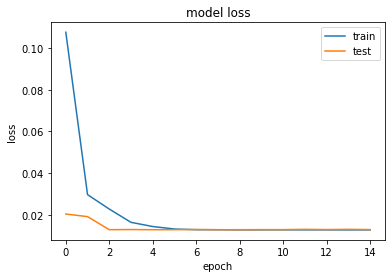

In [36]:
#Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('Loss')
plt.show()

In [37]:
Model.save("Model.h5")